In [ ]:
import torch
import matplotlib.pyplot as plt 

In [ ]:
import torch
import torch.nn.functional as F

# Sample 2D tensor (e.g., a grayscale image)
t = torch.arange(16).float().reshape(1, 1, 4, 4)  # shape [batch, channel, height, width]

In [ ]:
F.interpolate(t, size=(2, 2), align_corners=False, mode='bilinear')

tensor([[[[ 2.5000,  4.5000],
          [10.5000, 12.5000]]]])

In [ ]:
F.interpolate(t, size=(2, 2), align_corners=True, mode='bilinear')

tensor([[[[ 0.,  3.],
          [12., 15.]]]])

In [ ]:
import torch
import torch.nn.functional as F

# Sample 2D tensor (e.g., a grayscale image)
t = torch.arange(25).float().reshape(1, 1, 5, 5)  # shape [batch, channel, height, width]
t

tensor([[[[ 0.,  1.,  2.,  3.,  4.],
          [ 5.,  6.,  7.,  8.,  9.],
          [10., 11., 12., 13., 14.],
          [15., 16., 17., 18., 19.],
          [20., 21., 22., 23., 24.]]]])

In [ ]:
F.interpolate(t, size=(4, 4), align_corners=False, mode='bilinear')

tensor([[[[ 0.7500,  2.0000,  3.2500,  4.5000],
          [ 7.0000,  8.2500,  9.5000, 10.7500],
          [13.2500, 14.5000, 15.7500, 17.0000],
          [19.5000, 20.7500, 22.0000, 23.2500]]]])

In [ ]:
F.interpolate(t, size=(4, 4), align_corners=True, mode='bilinear')

tensor([[[[ 0.0000,  1.3333,  2.6667,  4.0000],
          [ 6.6667,  8.0000,  9.3333, 10.6667],
          [13.3333, 14.6667, 16.0000, 17.3333],
          [20.0000, 21.3333, 22.6667, 24.0000]]]])

## Grid sample

In [ ]:
import torch

input = torch.randn(1, 3, 10, 10)

# Grid defining a horizontal shift of 2 pixels (batch size 1, output 10x10)
grid = torch.zeros(1, 10, 10, 2)
grid[:, :, :, 0] = torch.arange(0, 10).float() / 9.0 + 0.2  # x-coordinates with a shift of 0.2
grid[:, :, :, 1] = torch.arange(0, 10).float().unsqueeze(1) / 9.0  # y-coordinates

# Sample the image using bilinear interpolation
output = torch.nn.functional.grid_sample(input, grid, mode='bilinear', align_corners=False)

print(output.shape)  # torch.Size([1, 3, 10, 10])

torch.Size([1, 3, 10, 10])


In [ ]:
t = torch.tensor([[1, 0, 0], [0, 1, 0], [0, 0,1]])

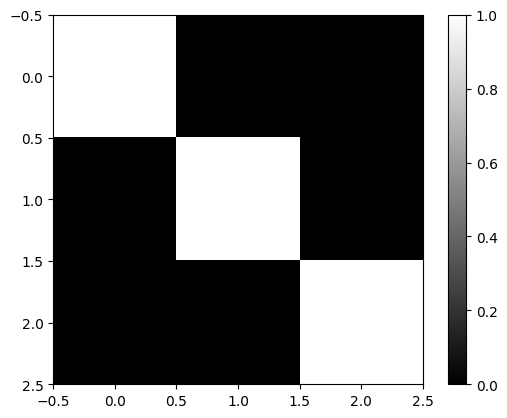

In [ ]:
plt.imshow(t.numpy(),cmap='gray')
plt.colorbar()

In [ ]:
t.shape

torch.Size([3, 3])

In [ ]:
torch.nn.functional.interpolate(t.reshape(1,1,3, 3).float(), size=(2,2), mode='bilinear')

tensor([[[[0.6250, 0.0625],
          [0.0625, 0.6250]]]])

In [ ]:
from bliss.grid import get_mgrid
grid = get_mgrid(3, torch.device("cpu"))
grid

tensor([[[-0.6667, -0.6667],
         [ 0.0000, -0.6667],
         [ 0.6667, -0.6667]],

        [[-0.6667,  0.0000],
         [ 0.0000,  0.0000],
         [ 0.6667,  0.0000]],

        [[-0.6667,  0.6667],
         [ 0.0000,  0.6667],
         [ 0.6667,  0.6667]]])

In [ ]:
from torch.nn.functional import grid_sample
grid_sample(t.reshape(1, 1, 3, 3).float(), grid.reshape(1, 3, 3, 2), align_corners=True)

tensor([[[[0.5556, 0.3333, 0.1111],
          [0.3333, 1.0000, 0.3333],
          [0.1111, 0.3333, 0.5556]]]])

/home/imendoza/.cache/pypoetry/virtualenvs/bliss-deblender-W0ocb7P7-py3.10/lib/python3.10/site-packages/torch/nn/functional.py:4377: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


ValueError: Expected a batch of 2D affine matrices of shape Nx2x3 for size torch.Size([1, 1, 2, 2]). Got torch.Size([1, 3, 3]).